In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.1.0_lbwsg_modeled_causes/ciff_sam/2021_12_21_13_05_05/count_data/'

In [3]:
figname = 'model_5'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [5]:
wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
wasting_pt

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,cat2,covered,covered,uncovered,early_neonatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138235,138235,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,2332.476386,cat1,uncovered,uncovered,covered,2_to_4
138236,138236,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,2510.609172,cat2,uncovered,covered,uncovered,2_to_4
138237,138237,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,2330.992471,cat1,uncovered,covered,uncovered,2_to_4
138238,138238,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,1075.504449,cat2,uncovered,uncovered,uncovered,2_to_4


In [7]:
cols = ['input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [8]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [9]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [10]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


value                      \
                                               count      mean       std   
sex    age        cause                                                    
female 1-5_months mild_child_wasting            12.0  0.201574  0.002945   
                  moderate_acute_malnutrition   12.0  0.080286  0.002255   
                  severe_acute_malnutrition     12.0  0.022882  0.002207   
                  susceptible_to_child_wasting  12.0  0.695258  0.005827   
                  wasted                        12.0  0.103168  0.004223   

                                                                              \
                                                     min      2.5%       50%   
sex    age        cause                                                        
female 1-5_months mild_child_wasting            0.196326  0.196685  0.201527   
                  moderate_acute_malnutrition   0.075610  0.076267  0.080686   
                  severe_acute_malnutrition     0.018864  0.018949  0.023486   
                  susceptible_to_child_wasting  0.683204  0.685095  0.695129   
                  wasted                        0.094783  0.095586  0.103887   

                                                                    
                                                   97.5%       max  
sex    age        cause                                             
female 1-5_months mild_child_wasting            0.206642  0.207487  
                  moderate_acute_malnutrition   0.083420  0.083804  
                  severe_acute_malnutrition     0.025464  0.025505  
                  susceptible_to_child_wasting  0.705749  0.707583  
                  wasted                        0.108884  0.109310

In [11]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     12.0  0.040249  0.003907  0.034247  0.034658   
                  cat2     12.0  0.108472  0.002580  0.103393  0.103815   
                  cat3     12.0  0.204981  0.007169  0.191559  0.192113   
                  cat4     12.0  0.646297  0.007545  0.634491  0.635359   
                  stunted  12.0  0.148721  0.005734  0.137641  0.138994   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.039555  0.047617  0.048065  
                  cat2     0.108697  0.112247  0.112591  
                  cat3     0.205228  0.213989  0.214603  
                  cat4     0.648108  0.658963  0.661559  
                  stunted  0.148252  0.158686  0.159403

In [12]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [13]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [14]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.023100,0.019989,0.026792,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.080399,0.076361,0.084449,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.200563,0.195923,0.205312,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,0.695938,0.687181,0.704784,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.023190,0.019931,0.027105,late_neonatal,2


In [15]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.0,0.0,0.0,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.0,0.0,0.0,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.0,0.0,0.0,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,1.0,1.0,1.0,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.0,0.0,0.0,late_neonatal,2


In [16]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

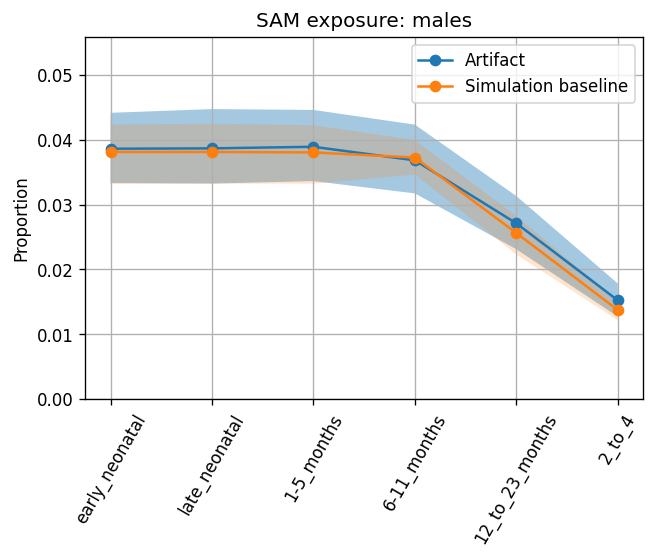

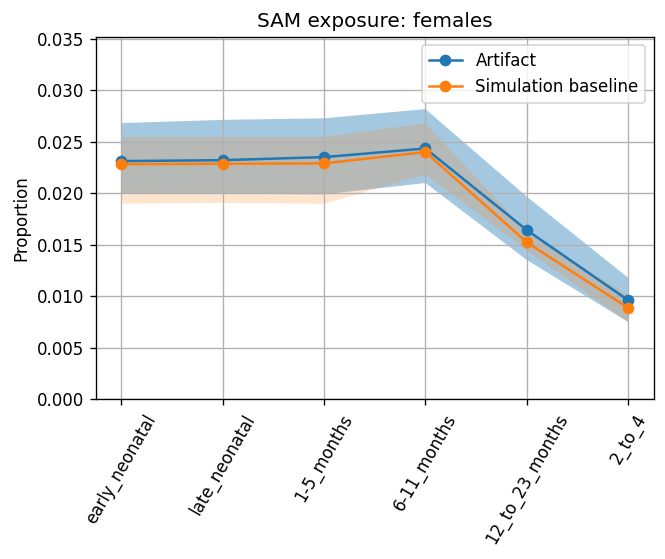

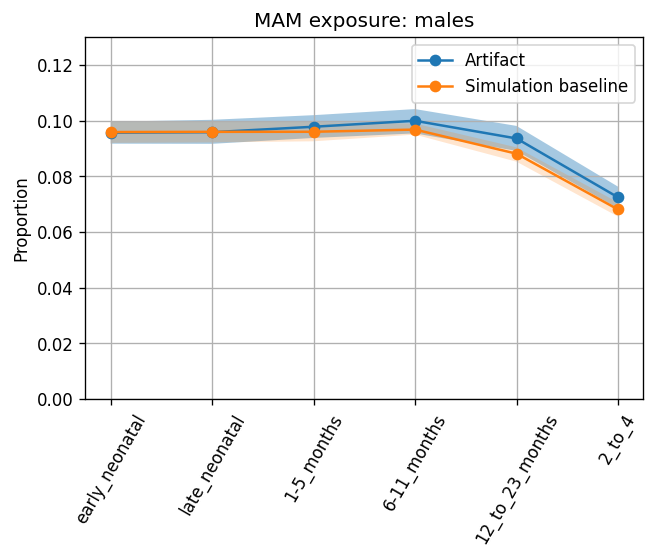

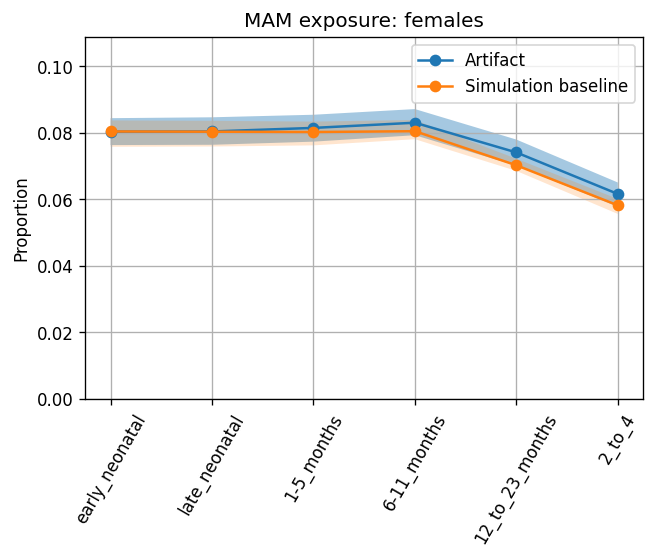

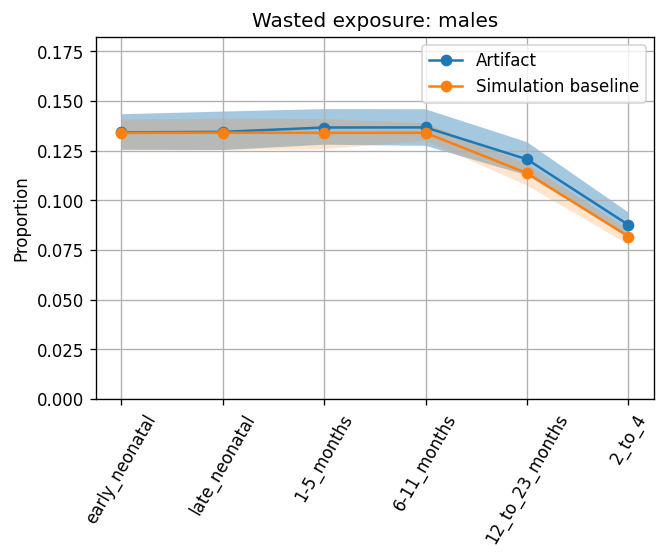

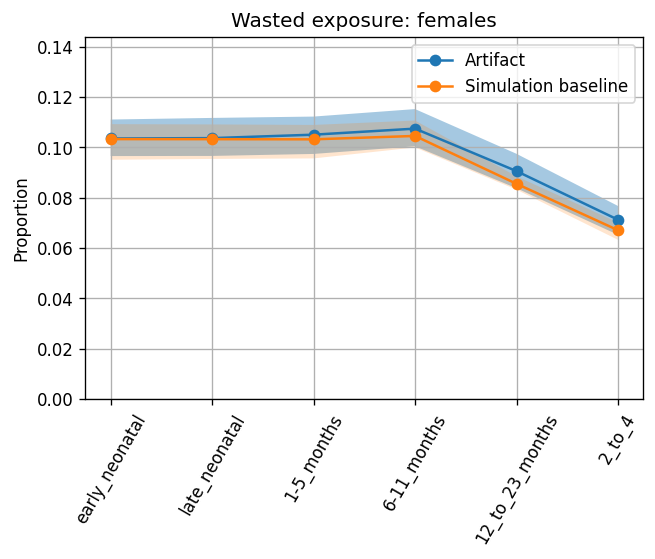

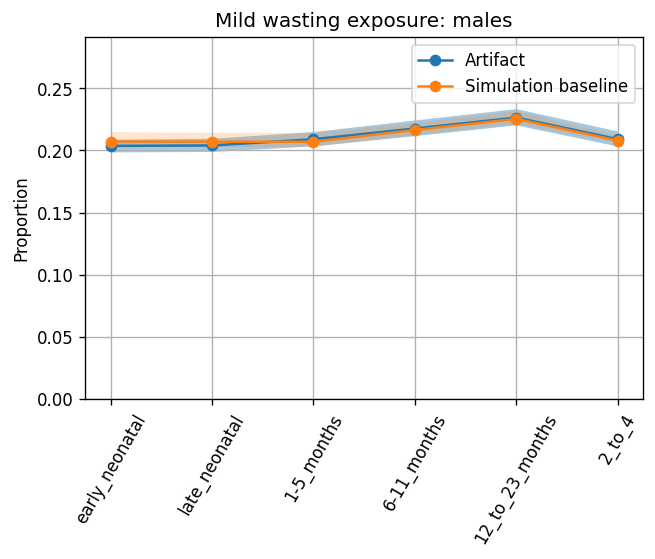

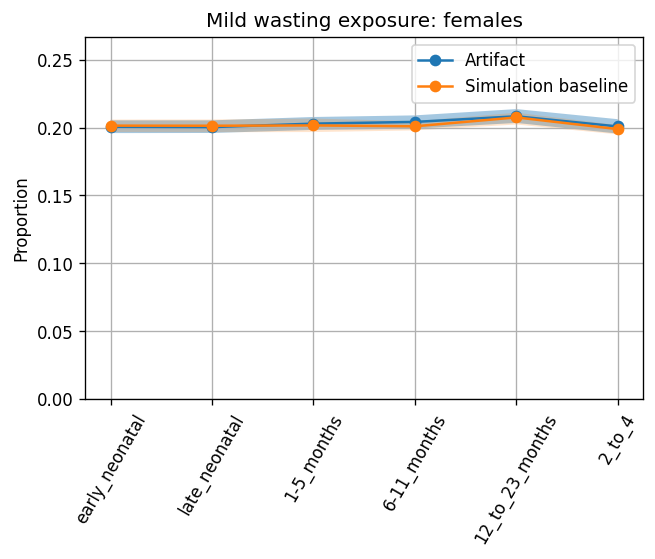

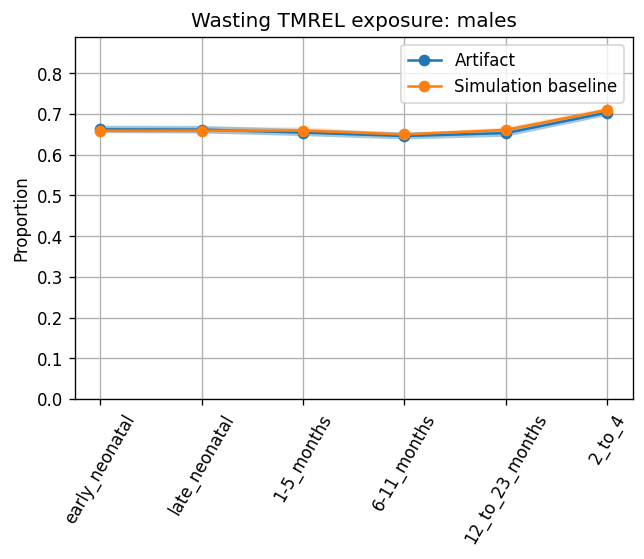

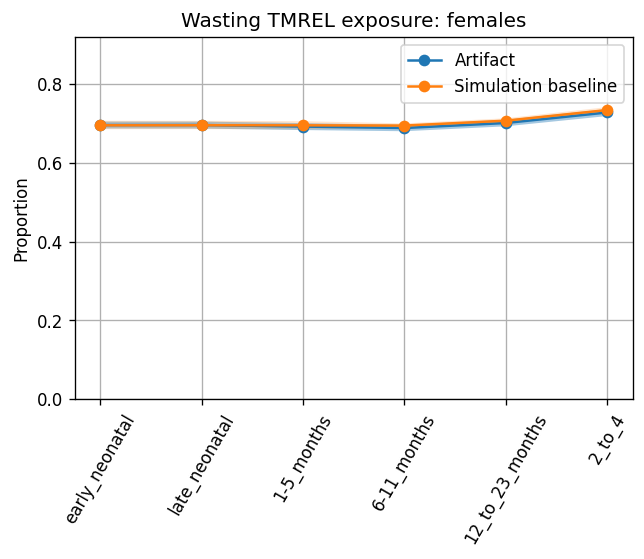

In [36]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    #for i in list(range(0,len(art_cats))):
    #    for sex in ['male','female']:
    #        plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
    #                          art_cats[i], s_sim_cats[i], s_title_cats[i])
    #        pdf.savefig(bbox_inches='tight')

# Cause parameters

In [37]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [38]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass

artifact_data.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
0,female,0.000000,0.019178,2020,2021,0.869707,0.700294,1.093357,early_neonatal,1,cause_specific_mortality_rate,all_causes
1,female,0.019178,0.076712,2020,2021,0.098099,0.078973,0.123338,late_neonatal,2,cause_specific_mortality_rate,all_causes
2,female,0.076712,0.500000,2020,2021,0.012703,0.010194,0.015891,1-5_months,3,cause_specific_mortality_rate,all_causes
3,female,0.500000,1.000000,2020,2021,0.012703,0.010194,0.015891,6-11_months,4,cause_specific_mortality_rate,all_causes
4,female,1.000000,2.000000,2020,2021,0.003620,0.002928,0.004488,12_to_23_months,5,cause_specific_mortality_rate,all_causes


In [39]:
groupby_cols = ['input_draw','sex','age']

In [40]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,0,female,2022,diarrheal_diseases,death,29,baseline,10.0,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,death,29,baseline,3.0,mild_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,death,29,baseline,3.0,moderate_acute_malnutrition,early_neonatal
3,3,female,2022,diarrheal_diseases,death,29,baseline,0.0,severe_acute_malnutrition,early_neonatal
4,4,female,2022,diarrheal_diseases,death,29,baseline,24.0,susceptible_to_child_wasting,late_neonatal


In [41]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [42]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [43]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [44]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [45]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
trans

value            \
                                                            count      mean   
sex    age           cause                        measure                     
female 1-5_months    diarrheal_diseases           incidence  12.0  2.698046   
                                                  remission  12.0  2.722984   
                     lower_respiratory_infections incidence  12.0  0.094449   
                                                  remission  12.0  0.091494   
                     measles                      incidence  12.0  0.019763   
...                                                           ...       ...   
male   late_neonatal diarrheal_diseases           remission  12.0  3.064568   
                     lower_respiratory_infections incidence  12.0  0.083540   
                                                  remission  12.0  0.053004   
                     measles                      incidence  12.0  0.000000   
                                                  remission  12.0  0.000000   

                                                                       \
                                                                  std   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  0.340951   
                                                  remission  0.329554   
                     lower_respiratory_infections incidence  0.010572   
                                                  remission  0.010539   
                     measles                      incidence  0.009954   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  0.251051   
                     lower_respiratory_infections incidence  0.011218   
                                                  remission  0.008420   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                  min   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.134924   
                                                  remission  2.196136   
                     lower_respiratory_infections incidence  0.070762   
                                                  remission  0.066988   
                     measles                      incidence  0.008181   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.570166   
                     lower_respiratory_infections incidence  0.061964   
                                                  remission  0.033047   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                 2.5%   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.208215   
                                                  remission  2.264925   
                     lower_respiratory_infections incidence  0.074573   
                                                  remission  0.071500   
                     measles                      incidence  0.008259   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.650096   
                     lower_respiratory_infections incidence  0.064579   
                                                  remission  0.036739   
                     measles   

In [48]:
trans.reset_index().loc[trans.reset_index().cause=='diarrheal_diseases']

sex              age               cause    measure value            \
                                                           count      mean   
0   female       1-5_months  diarrheal_diseases  incidence  12.0  2.698046   
1   female       1-5_months  diarrheal_diseases  remission  12.0  2.722984   
6   female  12_to_23_months  diarrheal_diseases  incidence  12.0  1.518420   
7   female  12_to_23_months  diarrheal_diseases  remission  12.0  1.534220   
12  female           2_to_4  diarrheal_diseases  incidence  12.0  1.517072   
13  female           2_to_4  diarrheal_diseases  remission  12.0  1.516513   
18  female      6-11_months  diarrheal_diseases  incidence  12.0  2.607685   
19  female      6-11_months  diarrheal_diseases  remission  12.0  2.610259   
24  female   early_neonatal  diarrheal_diseases  incidence  12.0  3.302995   
25  female   early_neonatal  diarrheal_diseases  remission  12.0  1.264832   
30  female    late_neonatal  diarrheal_diseases  incidence  12.0  3.377969   
31  female    late_neonatal  diarrheal_diseases  remission  12.0  3.100803   
36    male       1-5_months  diarrheal_diseases  incidence  12.0  2.692522   
37    male       1-5_months  diarrheal_diseases  remission  12.0  2.716310   
42    male  12_to_23_months  diarrheal_diseases  incidence  12.0  1.538536   
43    male  12_to_23_months  diarrheal_diseases  remission  12.0  1.552793   
48    male           2_to_4  diarrheal_diseases  incidence  12.0  1.546784   
49    male           2_to_4  diarrheal_diseases  remission  12.0  1.546144   
54    male      6-11_months  diarrheal_diseases  incidence  12.0  2.579788   
55    male      6-11_months  diarrheal_diseases  remission  12.0  2.581132   
60    male   early_neonatal  diarrheal_diseases  incidence  12.0  3.235369   
61    male   early_neonatal  diarrheal_diseases  remission  12.0  1.255724   
66    male    late_neonatal  diarrheal_diseases  incidence  12.0  3.370395   
67    male    late_neonatal  diarrheal_diseases  remission  12.0  3.064568   

                                                                
         std       min      2.5%       50%     97.5%       max  
0   0.340951  2.134924  2.208215  2.603254  3.200961  3.221158  
1   0.329554  2.196136  2.264925  2.613220  3.210830  3.229373  
6   0.107372  1.366202  1.377794  1.520549  1.717650  1.753199  
7   0.108164  1.376976  1.391041  1.537943  1.733678  1.768698  
12  0.114582  1.338879  1.356299  1.521287  1.716749  1.747361  
13  0.114629  1.338477  1.355843  1.521035  1.716473  1.747260  
18  0.326261  2.033093  2.105475  2.513925  3.066747  3.085183  
19  0.325379  2.039004  2.112000  2.516275  3.069685  3.088778  
24  0.293689  2.648691  2.748102  3.403824  3.661274  3.678378  
25  0.150476  1.006206  1.032279  1.265249  1.462752  1.466614  
30  0.267828  2.782550  2.877789  3.435988  3.697872  3.698985  
31  0.260855  2.557315  2.635174  3.135400  3.447595  3.448319  
36  0.346558  2.120082  2.202009  2.595886  3.213611  3.233429  
37  0.333982  2.174206  2.247526  2.610632  3.221016  3.238175  
42  0.119492  1.405879  1.407991  1.514782  1.741201  1.752798  
43  0.120685  1.419677  1.422440  1.529787  1.757385  1.768909  
48  0.122410  1.404068  1.406409  1.520463  1.742030  1.750132  
49  0.122322  1.403480  1.405977  1.519456  1.741243  1.749465  
54  0.325428  2.021020  2.108139  2.492270  3.058980  3.060688  
55  0.326451  2.026302  2.112379  2.489877  3.064482  3.066858  
60  0.281597  2.648220  2.714050  3.261971  3.614664  3.640676  
61  0.147110  1.030174  1.043660  1.250408  1.484015  1.488561  
66  0.256061  2.814508  2.902308  3.386440  3.715280  3.733884  
67  0.251051  2.570166  2.650096  3.072383  3.435806  3.454047

In [52]:
artifact_data.loc[(artifact_data.cause=='diarrheal_diseases')&(artifact_data.measure.isin(['incidence_rate','remission_rate']))]

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
24,female,0.000000,0.019178,2020,2021,3.689702,3.233220,3.929672,early_neonatal,1,incidence_rate,diarrheal_diseases
25,female,0.019178,0.076712,2020,2021,3.633241,3.193225,3.878895,late_neonatal,2,incidence_rate,diarrheal_diseases
26,female,0.076712,0.500000,2020,2021,2.913438,2.367051,3.549568,1-5_months,3,incidence_rate,diarrheal_diseases
27,female,0.500000,1.000000,2020,2021,2.913438,2.367051,3.549568,6-11_months,4,incidence_rate,diarrheal_diseases
28,female,1.000000,2.000000,2020,2021,1.642656,1.252509,2.098485,12_to_23_months,5,incidence_rate,diarrheal_diseases
29,female,2.000000,5.000000,2020,2021,1.642656,1.252509,2.098485,2_to_4,6,incidence_rate,diarrheal_diseases
30,male,0.000000,0.019178,2020,2021,3.704897,3.295181,3.924238,early_neonatal,1,incidence_rate,diarrheal_diseases
31,male,0.019178,0.076712,2020,2021,3.646248,3.255340,3.874671,late_neonatal,2,incidence_rate,diarrheal_diseases
32,male,0.076712,0.500000,2020,2021,2.900479,2.352625,3.508276,1-5_months,3,incidence_rate,diarrheal_diseases
33,male,0.500000,1.000000,2020,2021,2.900479,2.352625,3.508276,6-11_months,4,incidence_rate,diarrheal_diseases


In [34]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


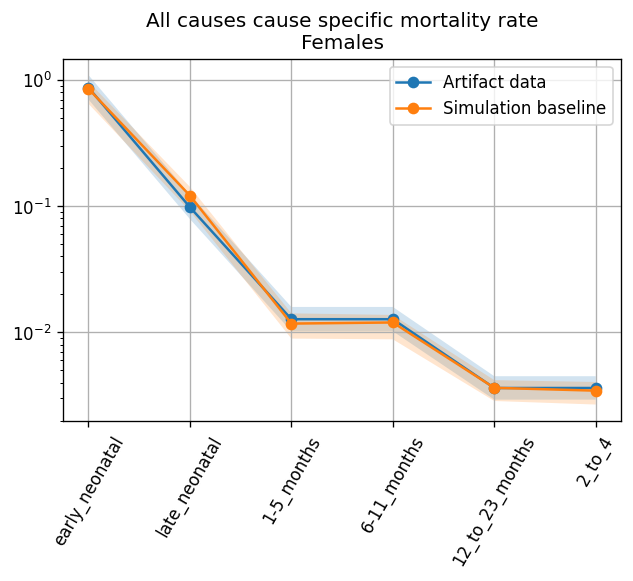

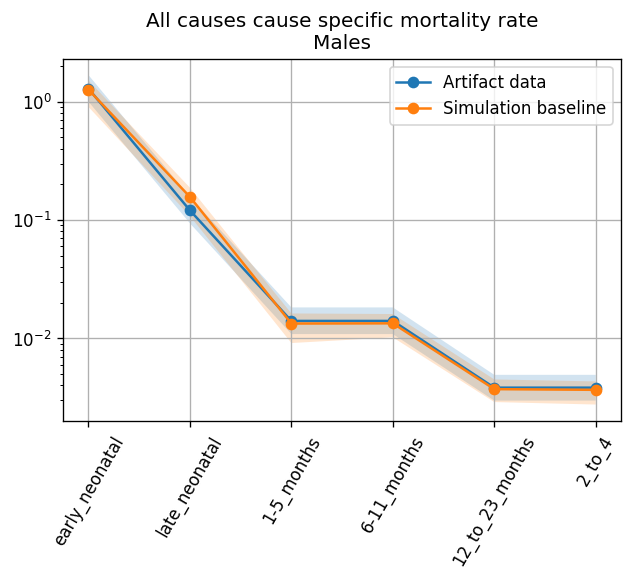

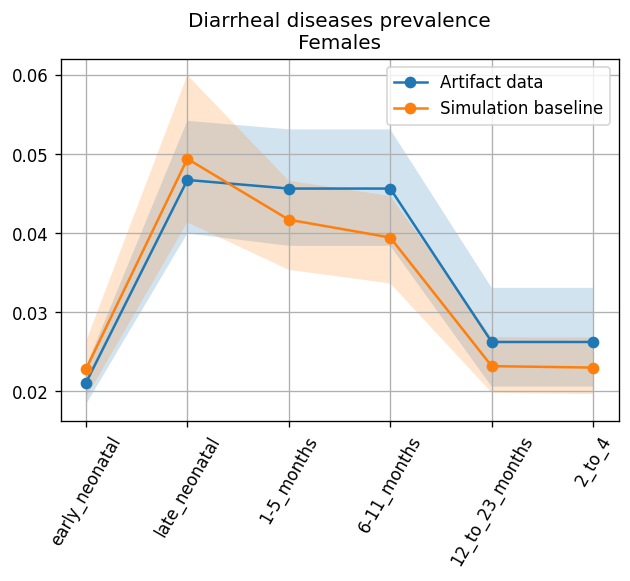

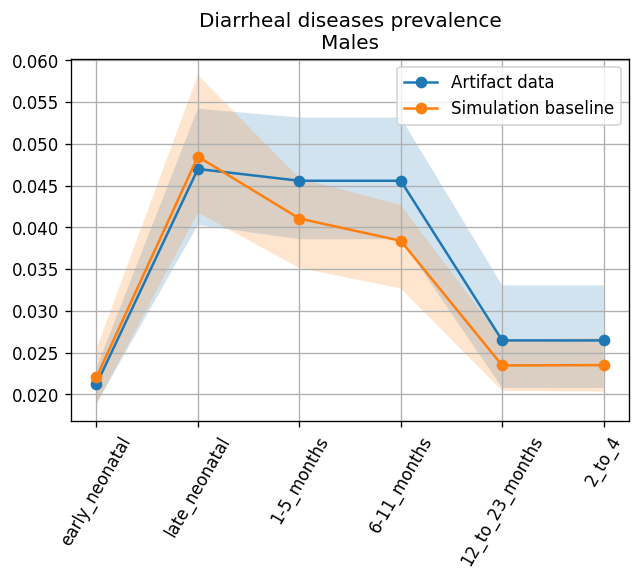

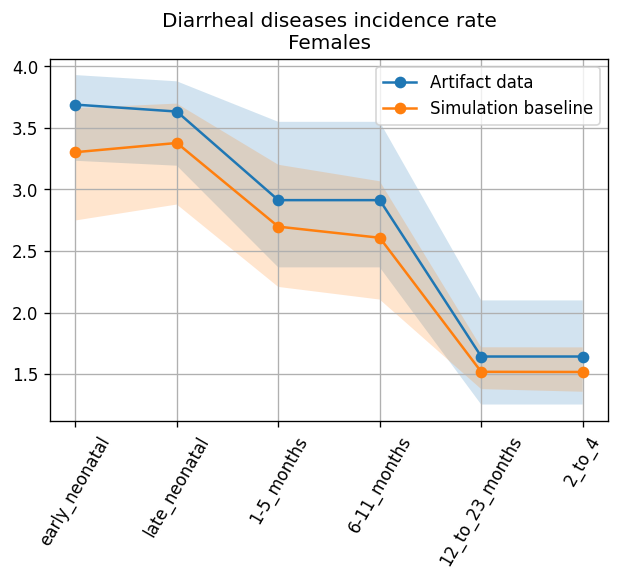

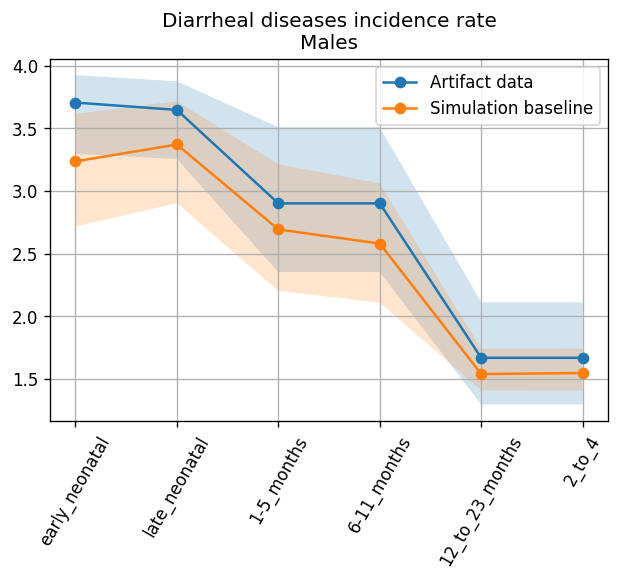

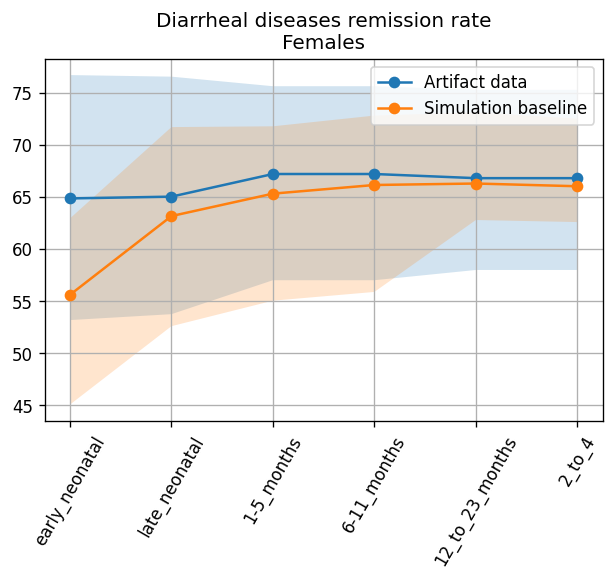

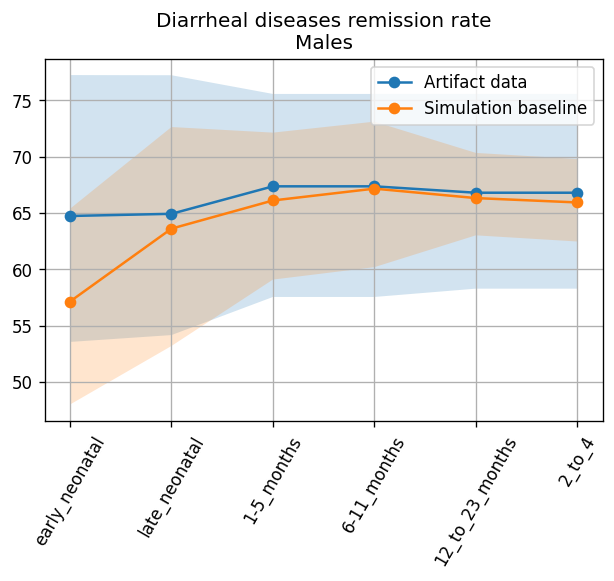

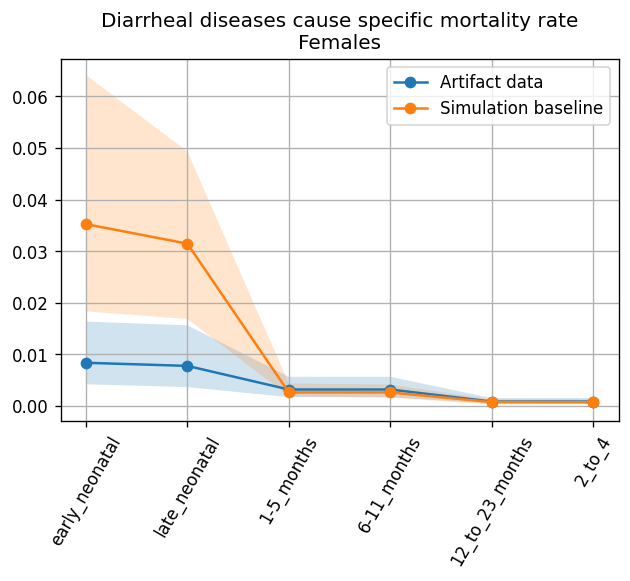

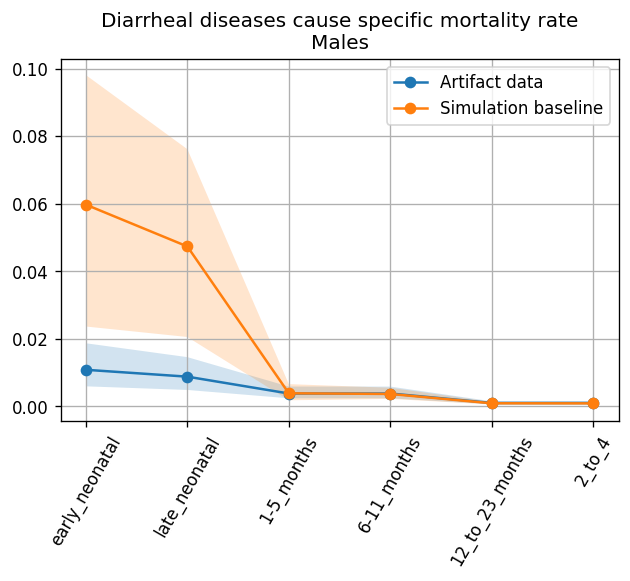

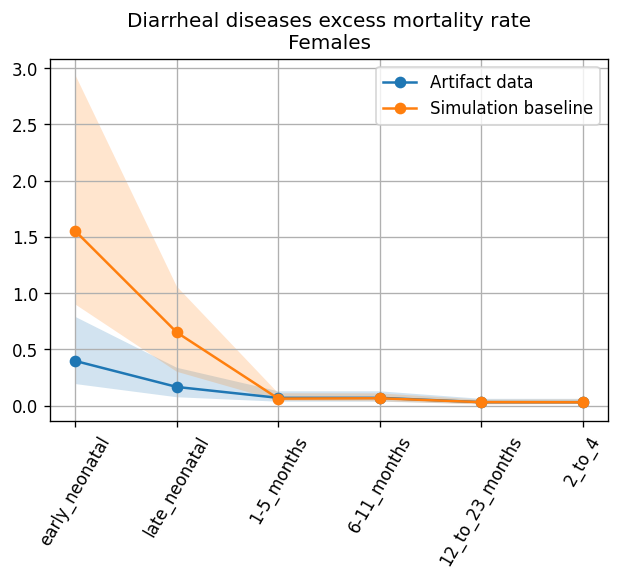

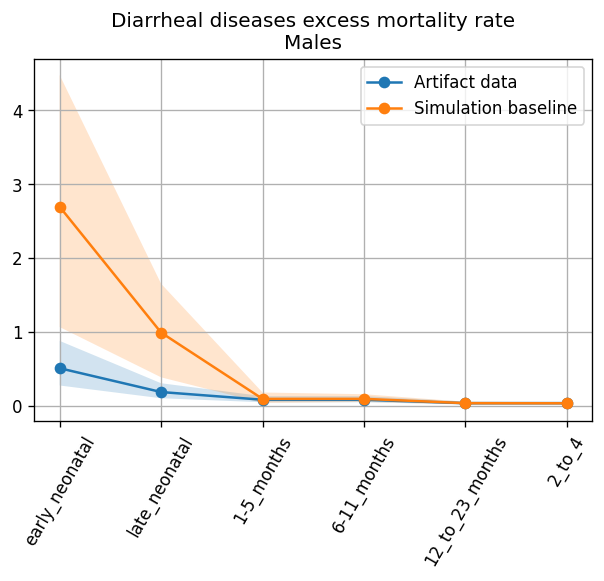

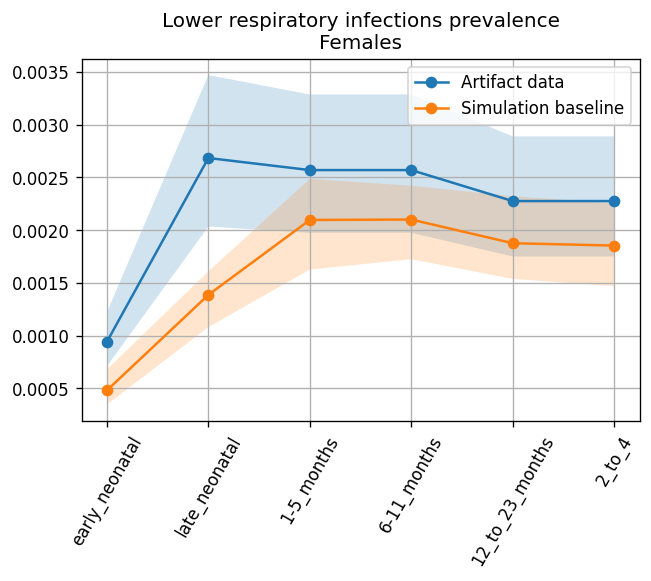

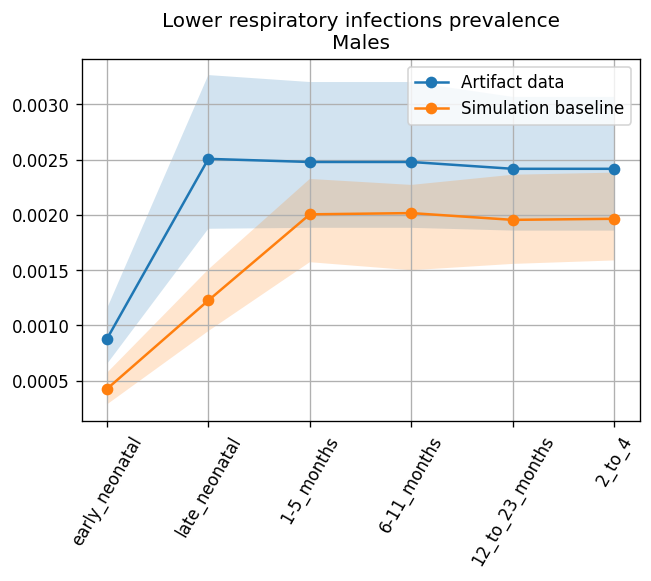

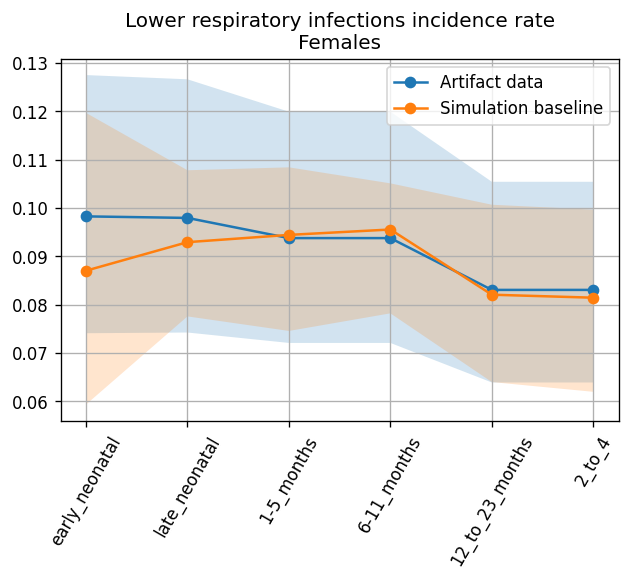

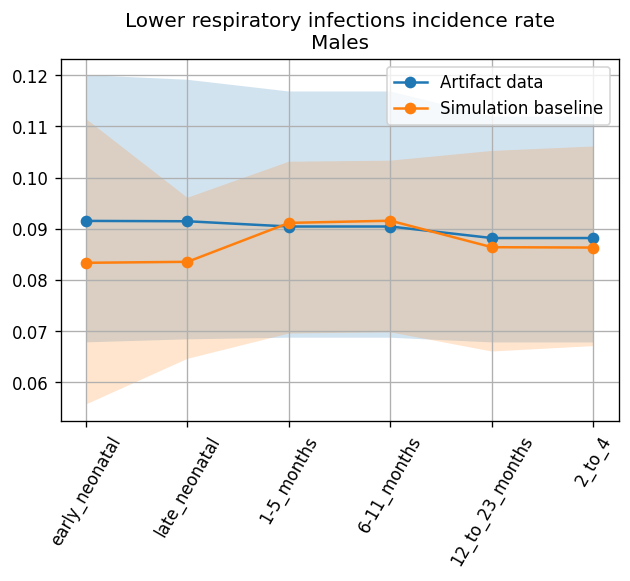

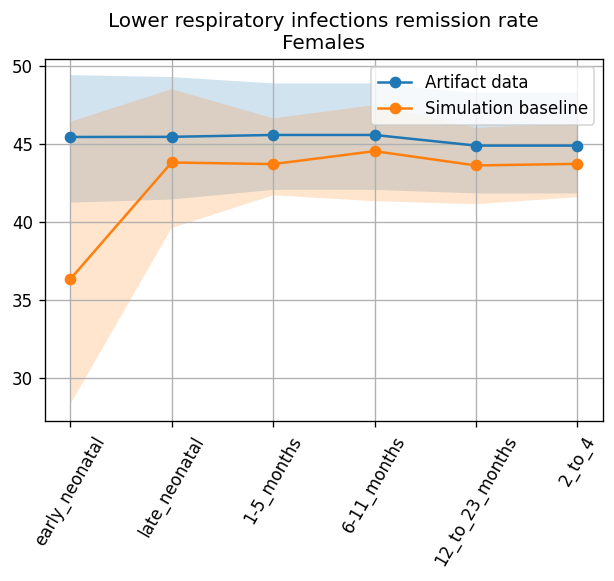

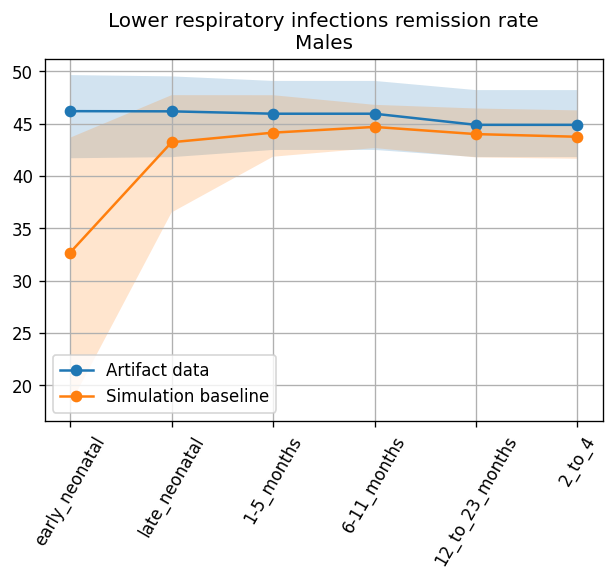

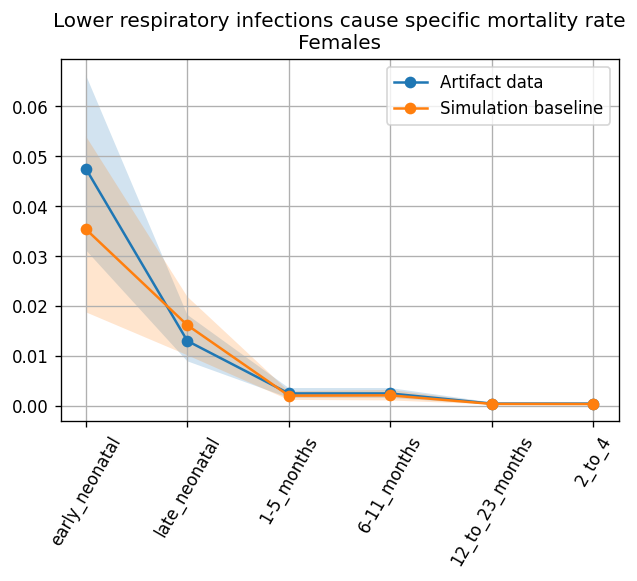

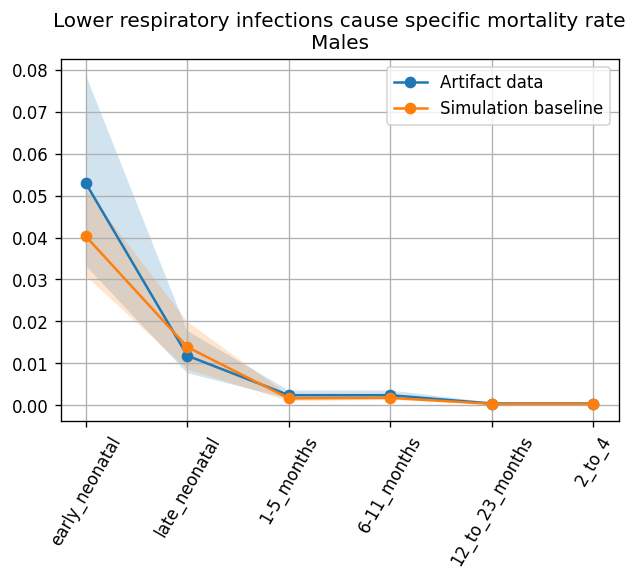

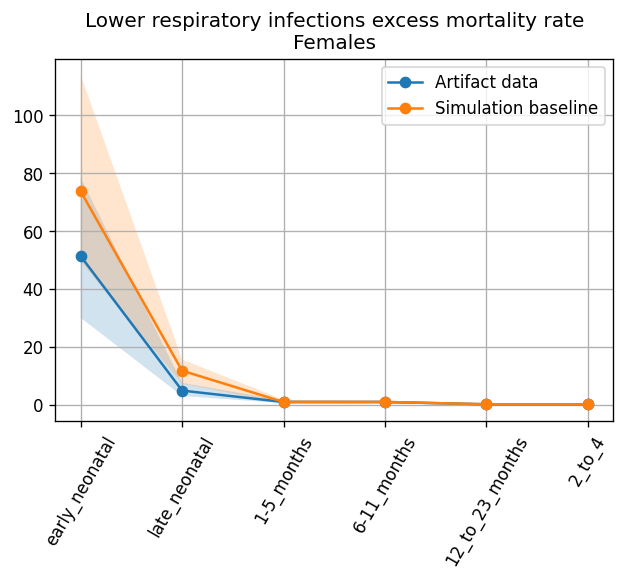

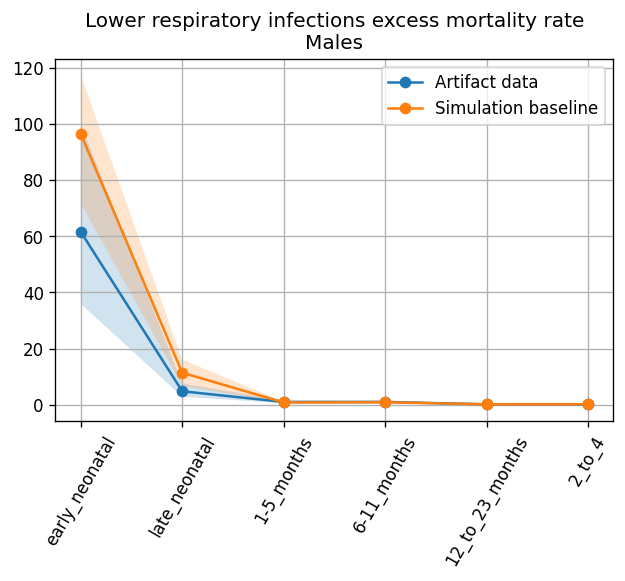

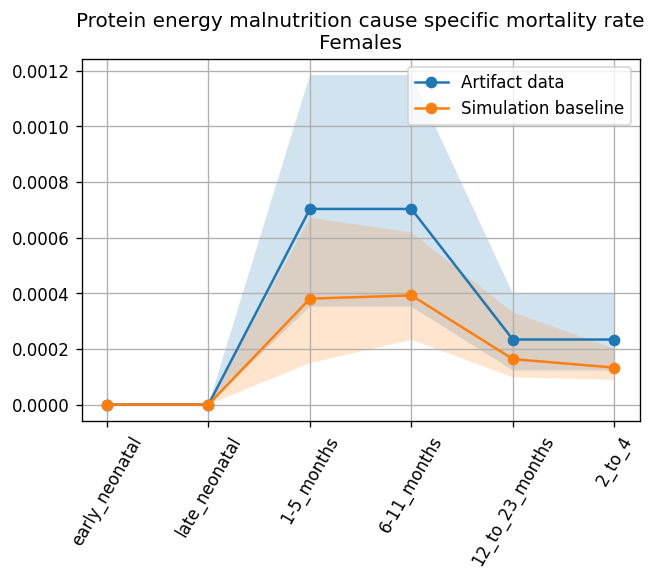

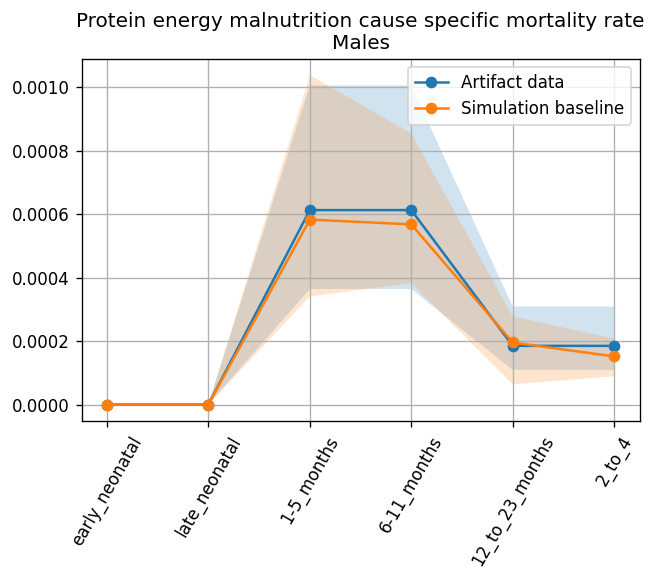

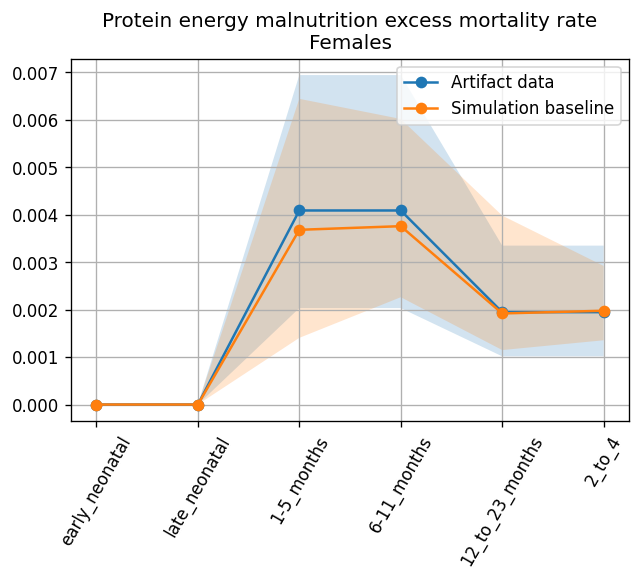

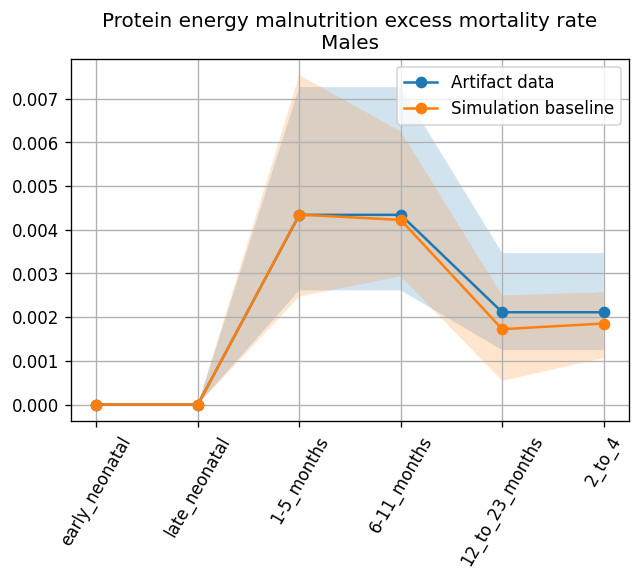

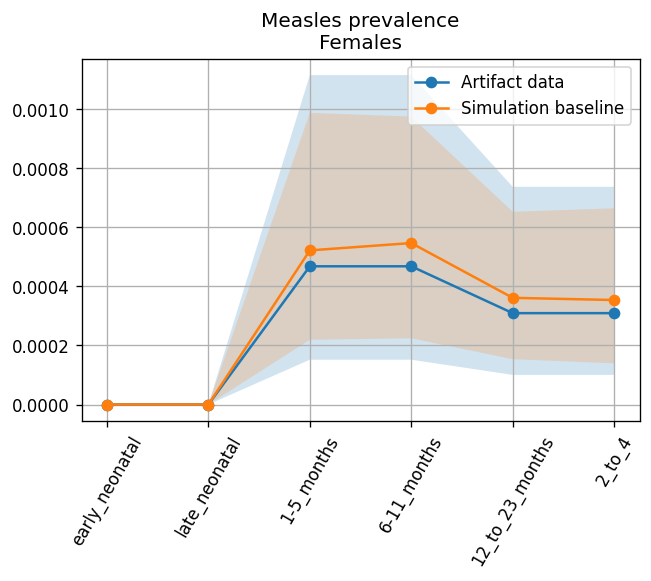

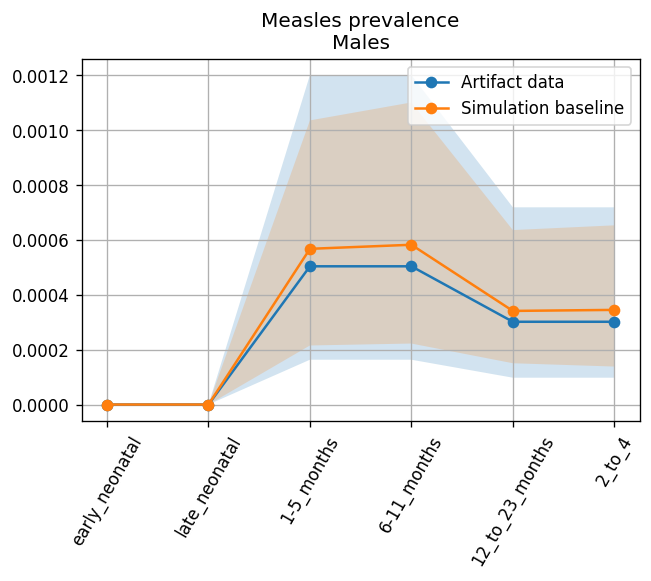

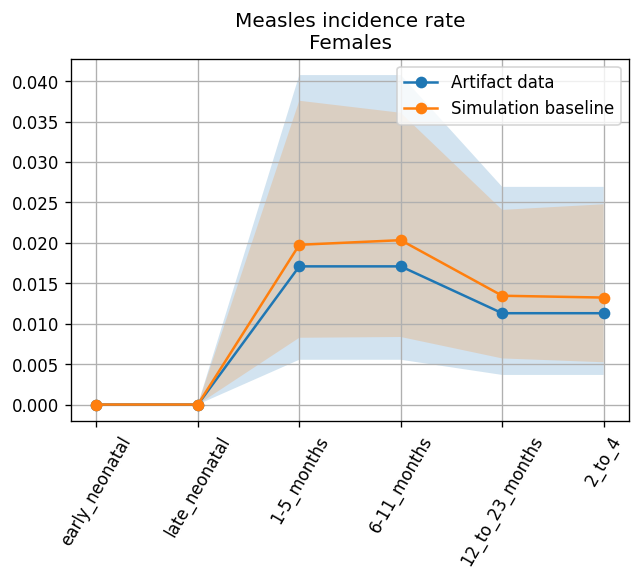

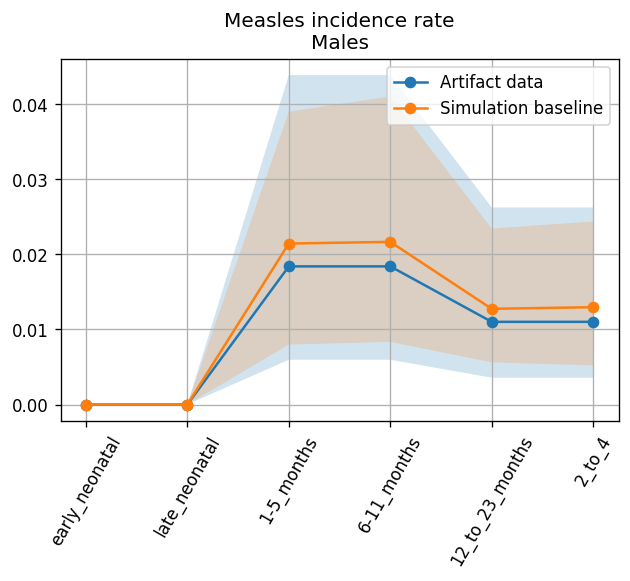

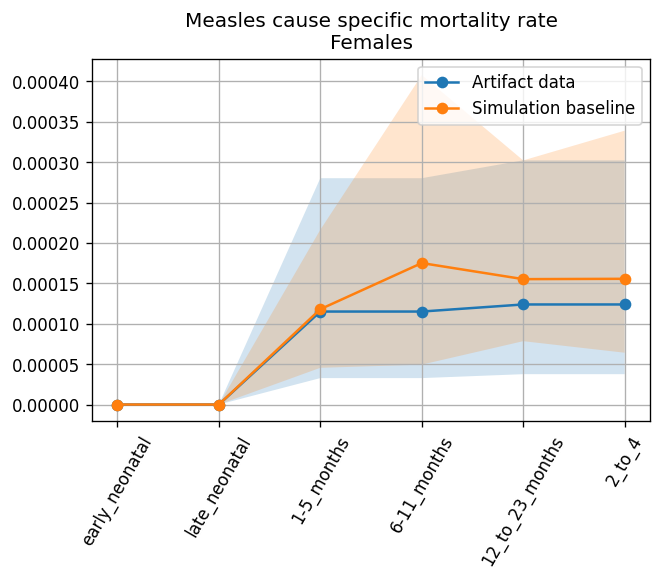

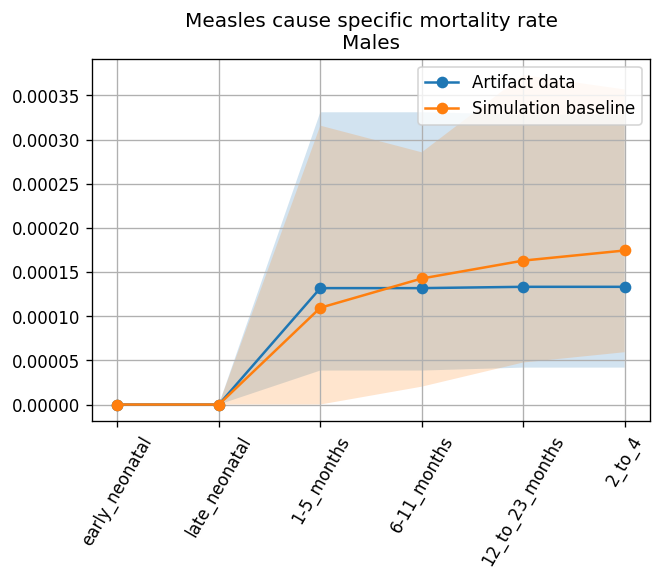

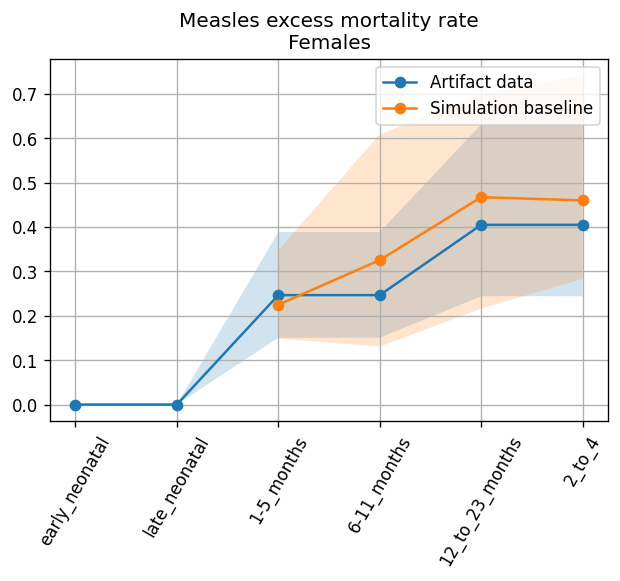

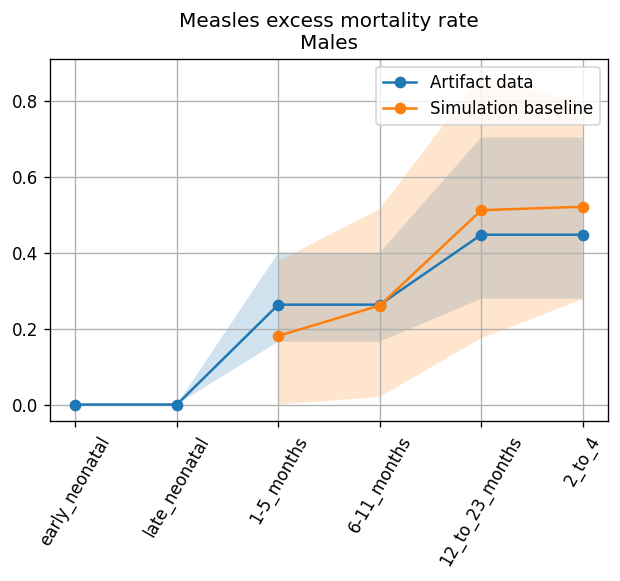

In [35]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass